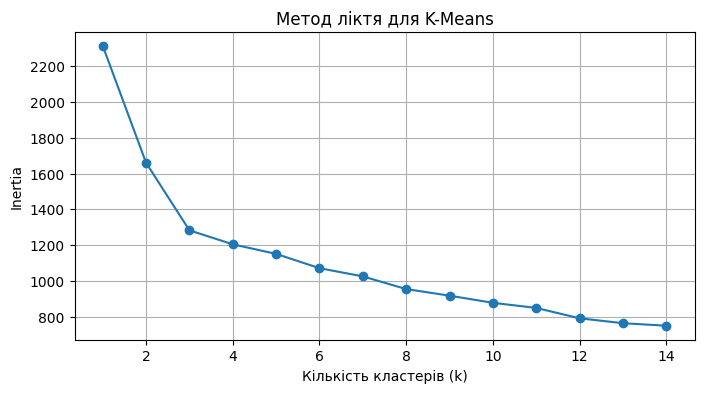

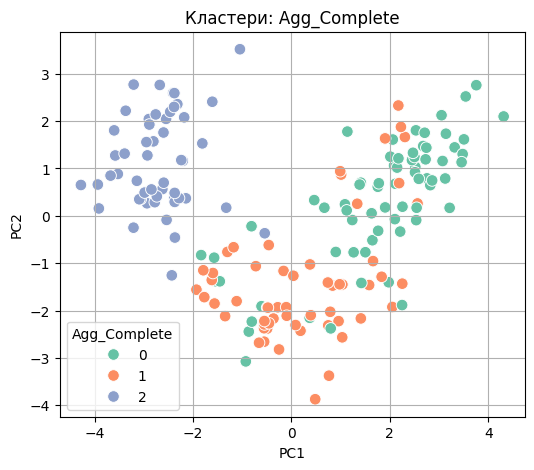

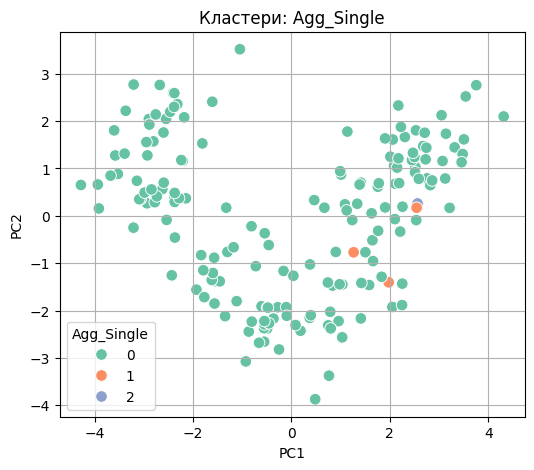

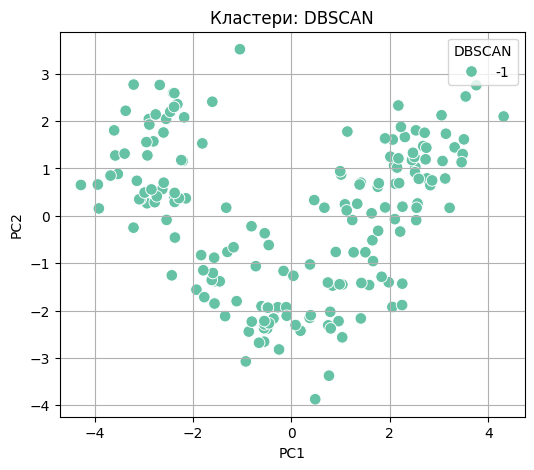

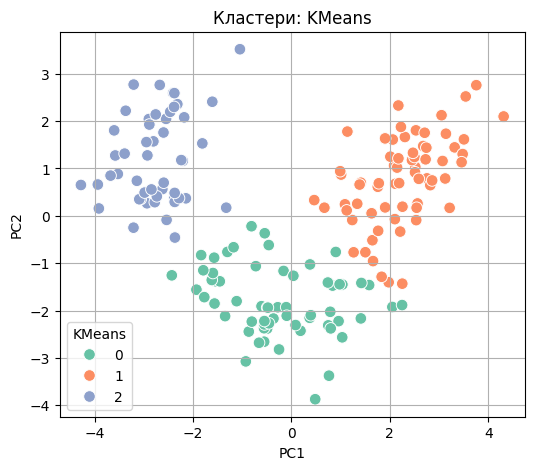

In [1]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class chim_wine:
    def __init__(self):
        wine = load_wine()
        self.X = pd.DataFrame(wine.data, columns=wine.feature_names)

        scaler = StandardScaler()
        self.X_scaled = scaler.fit_transform(self.X)

        pca = PCA(n_components=2)
        self.X_pca = pd.DataFrame(pca.fit_transform(self.X_scaled), columns=['PC1', 'PC2'])

    def alg_cluster(self):
        agg_complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
        self.X_pca['Agg_Complete'] = agg_complete.fit_predict(self.X_scaled)

        agg_single = AgglomerativeClustering(n_clusters=3, linkage='single')
        self.X_pca['Agg_Single'] = agg_single.fit_predict(self.X_scaled)

    def DBSCAN(self):
        dbscan = DBSCAN(eps=1.5, min_samples=5)
        self.X_pca['DBSCAN'] = dbscan.fit_predict(self.X_scaled)

    def K_means(self):
        inertia = []
        k_range = range(1, 15)
        for k in k_range:
            kmeans = KMeans(n_clusters=k, random_state=50)
            kmeans.fit(self.X_scaled)
            inertia.append(kmeans.inertia_)

        plt.figure(figsize=(8, 4))
        plt.plot(k_range, inertia, marker='o')
        plt.title('Метод ліктя для K-Means')
        plt.xlabel('Кількість кластерів (k)')
        plt.ylabel('Inertia')
        plt.grid(True)
        plt.show()

        kmeans_final = KMeans(n_clusters=3, random_state=50)
        self.X_pca['KMeans'] = kmeans_final.fit_predict(self.X_scaled)

    def plot_clusters(self, method):
        if method not in self.X_pca.columns:
            return

        plt.figure(figsize=(6, 5))
        sns.scatterplot(data=self.X_pca, x='PC1', y='PC2', hue=method, palette='Set2', s=70)
        plt.title(f'Кластери: {method}')
        plt.grid(True)
        plt.show()


wine_obj = chim_wine()
wine_obj.alg_cluster()
wine_obj.DBSCAN()
wine_obj.K_means()

wine_obj.plot_clusters('Agg_Complete')
wine_obj.plot_clusters('Agg_Single')
wine_obj.plot_clusters('DBSCAN')
wine_obj.plot_clusters('KMeans')
